# Determining Egg Production by size
We were unable to find raw data to fit a logistic curve to. Instead we are using the following methodology to obtain a logistic curve from a Linear Regression between weight and egg production, Von Bertalanffy Growth Function and a Weight-Length relationship for Silver Carp.
* Take $L_\infty$ and plug into the Length-Weight formula to obtain $W_\infty$
* Use the regression to find max egg production from $W_\infty$
* Create new data set with portion of regression between 0 and max egg production, and add new points to represent 0 (minimum egg production) and the max egg production
* Fit new data set with Logistic Regression

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def lin_reg(weight):
  return 325.4*weight - 581_908
W_inf = 5390.615
W_min = 1788.285

def create_dataset(weight):
  if weight < W_min:
    return 0.001
  elif weight > W_inf:
    return lin_reg(W_inf)
  else:
    return lin_reg(weight)

In [3]:
from scipy.optimize import curve_fit

x_grid = np.linspace(0, W_inf*(1.5), 100)
y_grid = np.array([create_dataset(weight) for weight in x_grid], np.float32)
x_grid *= 1/(W_inf*(1.5))

def sigmoid(x, k, x0):
    return lin_reg(W_inf) / (1 + np.exp(-k*(x-x0)))

# Fit the curve
popt, pcov = curve_fit(sigmoid, x_grid, y_grid)
estimated_k, estimated_x0 = popt

# Plot the fitted curve
y_pred = sigmoid(x_grid, estimated_k, estimated_x0)
print(popt)

true_k = estimated_k/(W_inf*(1.5))
true_x0 = (estimated_x0*(W_inf*(1.5)))

x_grid = np.linspace(0, W_inf*(1.5), 100)
y_pred2 = sigmoid(x_grid, true_k, true_x0)

[11.89823899  0.44390415]


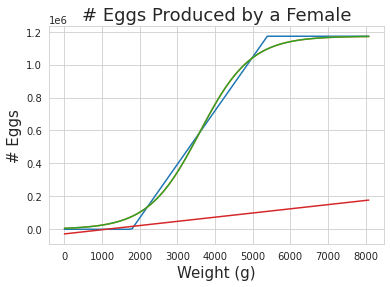

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

x_grid = np.linspace(0, W_inf*(1.5), 100)
plt.plot(x_grid, y_grid)
plt.plot(x_grid, y_pred)
plt.plot(x_grid, y_pred2)
plt.xlabel('Weight (g)', fontsize=15)
plt.ylabel('# Eggs', fontsize=15)
plt.title('# Eggs Produced by a Female', fontsize=18)
plt.show()

In [5]:
true_k, true_x0

(0.0014714757640310312, 3589.374527173143)